In [2]:
#Import block for all the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import glob
from functools import reduce
from itertools import cycle, islice



In [21]:
GDP_df = pd.read_csv("SGDP.csv")

In [22]:
GDP_df.head()

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.0,11063.0,143175.0,247144.0,158074.0,42367.0,615606.0,297539.0,...,359433.0,19208.0,724049.0,115523.0,NaN,3979.0,18768.0,343767.0,16818.0,8736039.0
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.0,12547.0,156864.0,282368.0,177511.0,38120.0,724495.0,347032.0,...,401493.0,21663.0,822903.0,131835.0,NaN,4421.0,21609.0,391238.0,18875.0,9946636.0
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.0,14602.0,177745.0,317101.0,206690.0,35921.0,807623.0,400662.0,...,452186.0,25593.0,944146.0,149817.0,NaN,5159.0,24787.0,443783.0,21870.0,11236635.0
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.0,16761.0,198098.0,373920.0,234982.0,40633.0,895027.0,437462.0,...,511178.0,29667.0,1043371.0,161985.0,NaN,5721.0,27844.0,492424.0,24089.0,12433749.0
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.0,18784.0,224234.0,413503.0,260776.0,45002.0,994316.0,485184.0,...,575631.0,NaN,1153795.0,184091.0,NaN,NaN,30304.0,551963.0,26533.0,13675331.0


In [23]:
GDP_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 36 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Items  Description         11 non-null     object 
 1   Duration                   11 non-null     object 
 2   Andhra Pradesh             11 non-null     float64
 3   Arunachal Pradesh          9 non-null      float64
 4   Assam                      9 non-null      float64
 5   Bihar                      9 non-null      float64
 6   Chhattisgarh               11 non-null     float64
 7   Goa                        9 non-null      float64
 8   Gujarat                    9 non-null      float64
 9   Haryana                    11 non-null     float64
 10  Himachal Pradesh           7 non-null      float64
 11  Jammu & Kashmir            9 non-null      float64
 12  Jharkhand                  9 non-null      float64
 13  Karnataka                  9 non-null      float64
 

In [24]:
#find the  isna() fnction helps find the null values in the dataframe
# mean funstion Helps fins the mean of each column * 100 helps to get it to percentage level
#round function rounds the decimal to 4 places as mentioned
# Calculating the Missing Values % contribution in DF
null_dfs = GDP_df.isna().mean()*100
null_dfs.round(4)
null_dfs

Items  Description             0.000000
Duration                       0.000000
Andhra Pradesh                 0.000000
Arunachal Pradesh             18.181818
Assam                         18.181818
Bihar                         18.181818
Chhattisgarh                   0.000000
Goa                           18.181818
Gujarat                       18.181818
Haryana                        0.000000
Himachal Pradesh              36.363636
Jammu & Kashmir               18.181818
Jharkhand                     18.181818
Karnataka                     18.181818
Kerala                        18.181818
Madhya Pradesh                 0.000000
Maharashtra                   36.363636
Manipur                       36.363636
Meghalaya                      0.000000
Mizoram                       36.363636
Nagaland                      36.363636
Odisha                         0.000000
Punjab                        36.363636
Rajasthan                     36.363636
Sikkim                        18.181818


In [26]:
# Dropping columns where all rows are NaN
GDP_df.dropna(axis=1, how= 'all')
GDP_df

,Items Description,Duration,Andhra Pradesh,Arunachal Pradesh,Assam,Bihar,Chhattisgarh,Goa,Gujarat,Haryana,...,Telangana,Tripura,Uttar Pradesh,Uttarakhand,West Bengal1,Andaman & Nicobar Islands,Chandigarh,Delhi,Puducherry,All_India GDP
0,GSDP - CURRENT PRICES (` in Crore),2011-12,379402.00,11063.00,143175.00,247144.00,158074.00,42367.00,615606.00,297539.00,...,359433.00,19208.00,724049.00,115523.00,NaN,3979.00,18768.00,343767.00,16818.00,8736039.00
1,GSDP - CURRENT PRICES (` in Crore),2012-13,411404.00,12547.00,156864.00,282368.00,177511.00,38120.00,724495.00,347032.00,...,401493.00,21663.00,822903.00,131835.00,NaN,4421.00,21609.00,391238.00,18875.00,9946636.00
2,GSDP - CURRENT PRICES (` in Crore),2013-14,464272.00,14602.00,177745.00,317101.00,206690.00,35921.00,807623.00,400662.00,...,452186.00,25593.00,944146.00,149817.00,NaN,5159.00,24787.00,443783.00,21870.00,11236635.00
3,GSDP - CURRENT PRICES (` in Crore),2014-15,526468.00,16761.00,198098.00,373920.00,234982.00,40633.00,895027.00,437462.00,...,511178.00,29667.00,1043371.00,161985.00,NaN,5721.00,27844.00,492424.00,24089.00,12433749.00
4,GSDP - CURRENT PRICES (` in Crore),2015-16,609934.00,18784.00,224234.00,413503.00,260776.00,45002.00,994316.00,485184.00,...,575631.00,NaN,1153795.00,184091.00,NaN,NaN,30304.00,551963.00,26533.00,13675331.00
5,GSDP - CURRENT PRICES (` in Crore),2016-17,699307.00,NaN,NaN,NaN,290140.00,NaN,NaN,547396.00,...,654294.00,NaN,NaN,NaN,NaN,NaN,NaN,622385.00,29557.00,15251028.00
6,(% Growth over previous year),2012-13,8.43,13.41,9.56,14.25,12.30,-10.02,17.69,16.63,...,11.70,12.78,13.65,14.12,NaN,11.13,15.14,13.81,12.23,13.86
7,(% Growth over previous year),2013-14,12.85,16.38,13.31,12.30,16.44,-5.77,11.47,15.45,...,12.63,18.14,14.73,13.64,NaN,16.68,14.71,13.43,15.87,12.97
8,(% Growth over previous year),2014-15,13.40,14.79,11.45,17.92,13.69,13.12,10.82,9.18,...,13.05,15.92,10.51,8.12,NaN,10.89,12.33,10.96,10.14,10.65
9,(% Growth over previous year),2015-16,15.85,12.07,13.19,10.59,10.98,10.75,11.09,10.91,...,12.61,NaN,10.58,13.65,NaN,NaN,8.84,12.09,10.15,9.99


In [29]:
GDP_df = GDP_df.T
dfx4 = GDP_df.drop(labels = ['Andaman & Nicobar Islands','Chandigarh','Delhi','Puducherry'])
dfx4

,0,1,2,3,4,5,6,7,8,9,10
Items Description,GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),GSDP - CURRENT PRICES (` in Crore),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year),(% Growth over previous year)
Duration,2011-12,2012-13,2013-14,2014-15,2015-16,2016-17,2012-13,2013-14,2014-15,2015-16,2016-17
Andhra Pradesh,379402.0,411404.0,464272.0,526468.0,609934.0,699307.0,8.43,12.85,13.4,15.85,14.65
Arunachal Pradesh,11063.0,12547.0,14602.0,16761.0,18784.0,NaN,13.41,16.38,14.79,12.07,NaN
Assam,143175.0,156864.0,177745.0,198098.0,224234.0,NaN,9.56,13.31,11.45,13.19,NaN
Bihar,247144.0,282368.0,317101.0,373920.0,413503.0,NaN,14.25,12.3,17.92,10.59,NaN
Chhattisgarh,158074.0,177511.0,206690.0,234982.0,260776.0,290140.0,12.3,16.44,13.69,10.98,11.26
Goa,42367.0,38120.0,35921.0,40633.0,45002.0,NaN,-10.02,-5.77,13.12,10.75,NaN
Gujarat,615606.0,724495.0,807623.0,895027.0,994316.0,NaN,17.69,11.47,10.82,11.09,NaN
Haryana,297539.0,347032.0,400662.0,437462.0,485184.0,547396.0,16.63,15.45,9.18,10.91,12.82


In [40]:
#dfx4_mean = dfx4.iloc[2:,6:10].mean(axis = 1).round(2).sort_values()
# get  the values from column 6 to 9 which are the from 2012 to 2016 . Get the mean for each state and  round it to 2 decimals

df_mean = dfx4.iloc[2:,6:10].mean(axis = 1).sort_values()

df_mean

Goa                       2.02
Meghalaya               7.6675
Sikkim                 10.4925
Odisha                 10.7125
Jammu & Kashmir        11.0025
Punjab               11.346667
All_India GDP          11.8675
Assam                  11.8775
Manipur                  11.89
Rajasthan                11.94
Maharashtra          12.103333
Uttar Pradesh          12.3675
Uttarakhand            12.3825
Telangana              12.4975
Jharkhand              12.5675
Andhra Pradesh         12.6325
Tamil Nadu             12.7125
Kerala                 12.7525
Gujarat                12.7675
Himachal Pradesh     12.816667
Haryana                13.0425
Chhattisgarh           13.3525
Bihar                   13.765
Arunachal Pradesh      14.1625
Karnataka                14.23
Madhya Pradesh         14.6475
Tripura              15.613333
Nagaland             15.953333
Mizoram              16.866667
West Bengal1               NaN
dtype: object

Text(0, 0.5, 'States')

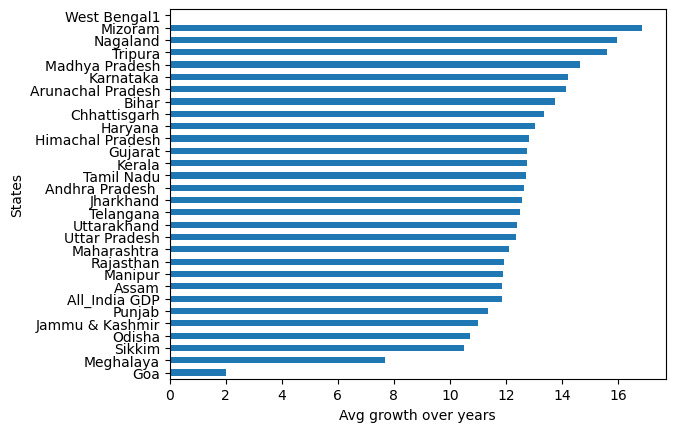

In [56]:
df_mean.plot(kind = 'barh')
plt.xlabel("Avg growth over years")
plt.ylabel("States")

In [60]:
df_myhome = df_mean[['Maharashtra', 'All_India GDP']]

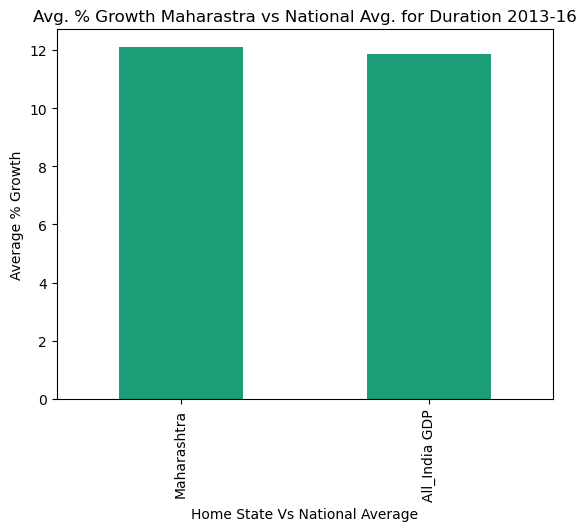

In [61]:
df_myhome.plot(kind='bar',stacked=True, colormap = 'Dark2')
plt.title("Avg. % Growth Maharastra vs National Avg. for Duration 2013-16")
plt.ylabel("Average % Growth")
plt.xlabel("Home State Vs National Average");

In [83]:
#Selecting the GSDP for year 2015-16

df2015_total_gdp = dfx4.iloc[2:,4:5]
df2015_total_gdp.drop(labels="All_India GDP",inplace=True)
df2015_total_gdp.sort_values(4)


,4
Sikkim,16637.0
Arunachal Pradesh,18784.0
Meghalaya,26745.0
Goa,45002.0
Jammu & Kashmir,118387.0
Uttarakhand,184091.0
Assam,224234.0
Jharkhand,241955.0
Chhattisgarh,260776.0
Odisha,341887.0


In [88]:
df2015_total_gdp = df2015_total_gdp.dropna()
df2015_total_gdp = df2015_total_gdp.sort_values(by = 4)

Text(0.5, 0, 'States')

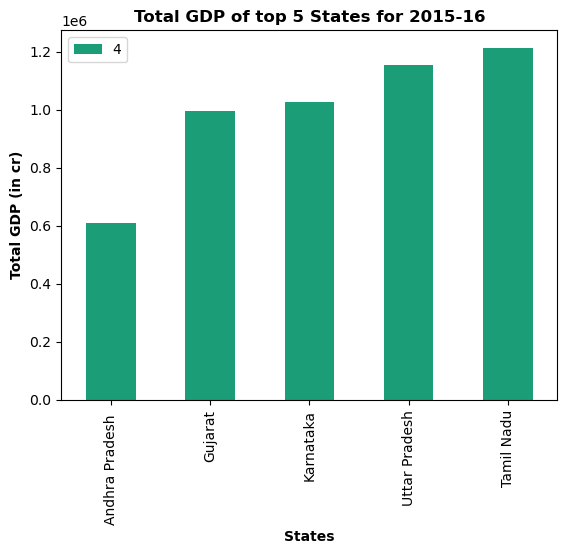

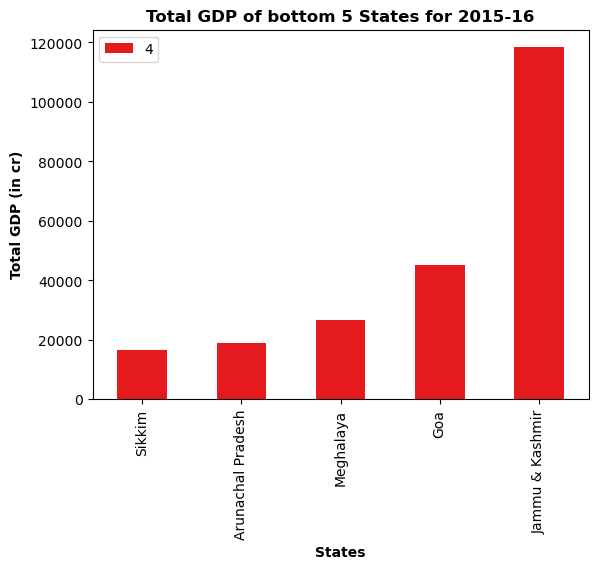

In [85]:
# GSDP of Top 5 States
#in the above df there is a sort that sorts the states according to the total GDP at the top is the lowest GDP
df2015_total_gdp = df2015_total_gdp.dropna().sort_values(by = 4)
df2015_total_gdp.tail(5).plot(kind='bar',stacked=True, colormap = 'Dark2')
plt.title("Total GDP of top 5 States for 2015-16", fontweight = 'bold')
plt.ylabel("Total GDP (in cr)",fontweight = 'bold')
plt.xlabel("States",fontweight = 'bold')


# GSDP of Bottom 5 States
df2015_total_gdp.head(5).plot(kind='bar',stacked=True, colormap = 'Set1')
plt.title("Total GDP of bottom 5 States for 2015-16", fontweight = 'bold')
plt.ylabel("Total GDP (in cr)",fontweight = 'bold')
plt.xlabel("States",fontweight = 'bold')

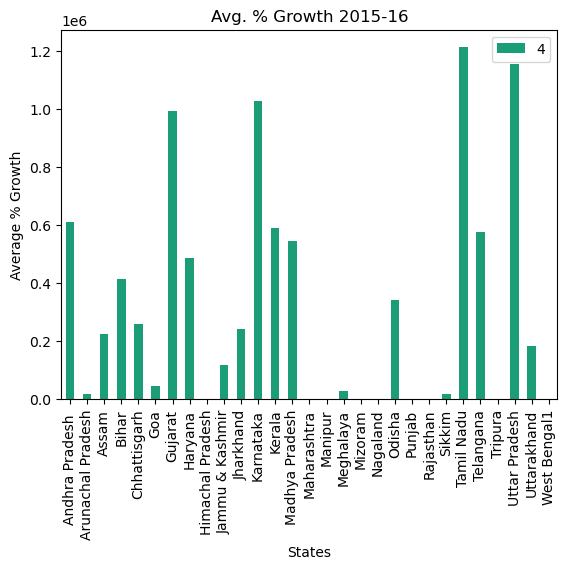

In [84]:
df2015_total_gdp.plot(kind='bar',stacked=True, colormap = 'Dark2')
plt.title("Avg. % Growth 2015-16")
plt.ylabel("Average % Growth")
plt.xlabel("States");